In [8]:
## Importing Libraries

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [10]:
## Data Preprocessing

In [11]:
## Training Image Preprocessing

In [12]:
training_set= tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [13]:
## Validation Image PreProcessing:

In [14]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [15]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [16]:
for x,y in training_set:
   print(x, x.shape)
   print(y, y.shape)
   break

tf.Tensor(
[[[[145.5  135.5  143.5 ]
   [150.5  140.5  148.5 ]
   [151.75 141.75 149.75]
   ...
   [118.75 107.75 113.75]
   [115.   104.   110.  ]
   [124.25 113.25 119.25]]

  [[153.   143.   151.  ]
   [146.75 136.75 144.75]
   [146.5  136.5  144.5 ]
   ...
   [124.   113.   119.  ]
   [125.5  114.5  120.5 ]
   [132.75 121.75 127.75]]

  [[147.   137.   145.  ]
   [145.25 135.25 143.25]
   [144.5  134.5  142.5 ]
   ...
   [115.5  104.5  110.5 ]
   [116.   105.   111.  ]
   [128.75 117.75 123.75]]

  ...

  [[177.   167.   165.  ]
   [178.   168.   166.  ]
   [180.5  170.5  168.5 ]
   ...
   [129.   115.   115.  ]
   [136.   122.   122.  ]
   [146.5  132.5  132.5 ]]

  [[175.5  165.5  163.5 ]
   [178.25 168.25 166.25]
   [181.5  171.5  169.5 ]
   ...
   [129.25 115.25 115.25]
   [141.5  127.5  127.5 ]
   [145.   131.   131.  ]]

  [[170.25 160.25 158.25]
   [176.   166.   164.  ]
   [173.75 163.75 161.75]
   ...
   [125.25 111.25 111.25]
   [142.75 128.75 128.75]
   [130.25 116.25 11

In [17]:
### To avoid Overshooting(loss should decrease but increases in overhooting)
##1. Choose small learning rate default 0.001 but we r using 0.0001
##2. There may be chance of underfitting(i.e not able to read the entire data properly), so increase the number of neuron
##3. Add more Convolution layer to extract more features of the images , there may be a chance of model not capturing the important features of the image 
   ##or the model is getting confused.

In [18]:
## Building Model


In [19]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten

In [20]:
model = Sequential()

In [21]:
## Building Convolution Layer

In [22]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))# Rectified Linear Unit(RelU)
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2))

In [24]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [25]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [26]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [27]:
model.add(Dropout(0.25)) #To avoid overfitting

In [28]:
model.add(Flatten())

In [29]:
model.add(Dense(units=1500,activation='relu'))

In [30]:
model.add(Dropout(0.4))

In [31]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

In [32]:
##Compiling Model

In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
### Model Training

In [39]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3538s 2s/step - accuracy: 0.4037 - loss: 2.1113 - val_accuracy: 0.8465 - val_loss: 0.4943
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3482s 2s/step - accuracy: 0.8350 - loss: 0.5276 - val_accuracy: 0.9026 - val_loss: 0.3061
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3475s 2s/step - accuracy: 0.9035 - loss: 0.3031 - val_accuracy: 0.9273 - val_loss: 0.2274
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3497s 2s/step - accuracy: 0.9358 - loss: 0.1959 - val_accuracy: 0.9333 - val_loss: 0.2194
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3463s 2s/step - accuracy: 0.9509 - loss: 0.1488 - val_accuracy: 0.9420 - val_loss: 0.1802
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3453s 2s/step - accuracy: 0.9597 - loss: 0.1211 - val_accuracy: 0.9569 - val_loss: 0.1336
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3514s 2s/step - accuracy: 0.9722 - loss: 0.0869 - val_accuracy: 0.9478 - val_loss: 0.1871
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3508s 2s/step - accuracy: 0.9723 -

In [42]:
model.save(r'C:\Users\Rakshita\Desktop\my_model.keras')

In [41]:
model.save('C:/Users/Rakshita/Desktop/my_model.h5')

In [43]:
import h5py

with h5py.File('training_history.h5', 'w') as hf:
    for key, value in training_history.history.items():
        hf.create_dataset(key, data=value)

In [44]:
##Model Evluation

In [45]:
## Model evaluation on training set
training_loss,training_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 896s 408ms/step - accuracy: 0.9686 - loss: 0.1037


In [46]:
print(training_loss,training_acc)

0.09718044102191925 0.9705811142921448


In [47]:
## Model evaluation on validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 223s 406ms/step - accuracy: 0.9395 - loss: 0.2154


In [48]:
print(val_loss,val_acc)

0.2122187465429306 0.9404165744781494


In [49]:
##Saving Model

In [52]:
model.save("trained_model.keras")

In [53]:
training_history.history

{'accuracy': [0.6022334694862366,
  0.8580126762390137,
  0.9115868806838989,
  0.939910352230072,
  0.9546909332275391,
  0.9630414843559265,
  0.9725869297981262,
  0.9744505286216736,
  0.9790596961975098,
  0.983085572719574],
 'loss': [1.3447487354278564,
  0.45237332582473755,
  0.27496474981307983,
  0.1826625019311905,
  0.1380797028541565,
  0.11250849813222885,
  0.08439613878726959,
  0.07701646536588669,
  0.06538450717926025,
  0.054599881172180176],
 'val_accuracy': [0.8464602828025818,
  0.9026291966438293,
  0.927327573299408,
  0.9333029985427856,
  0.9420100450515747,
  0.9568631649017334,
  0.9477577805519104,
  0.9733667373657227,
  0.967277467250824,
  0.9404165744781494],
 'val_loss': [0.494341641664505,
  0.30610090494155884,
  0.22743329405784607,
  0.2193870097398758,
  0.1802232265472412,
  0.13359485566616058,
  0.18713738024234772,
  0.08603689074516296,
  0.10705398768186569,
  0.21221886575222015]}

In [55]:
#Recording History in Json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [60]:
training_history.history['val_accuracy']

[0.8464602828025818,
 0.9026291966438293,
 0.927327573299408,
 0.9333029985427856,
 0.9420100450515747,
 0.9568631649017334,
 0.9477577805519104,
 0.9733667373657227,
 0.967277467250824,
 0.9404165744781494]

In [56]:
##Accuracy Visualisation

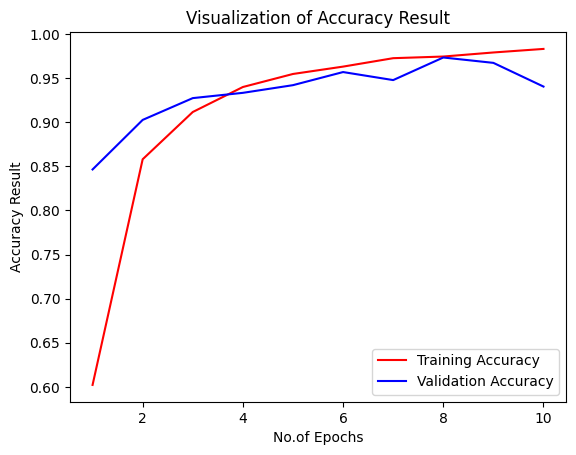

In [64]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No.of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [65]:
### Some other matrix for model evaluation

In [66]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [67]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [69]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 258s 469ms/step


(array([[9.9999952e-01, 3.6544806e-10, 2.3766011e-10, ..., 1.1902512e-13,
         4.5402301e-14, 1.1301005e-11],
        [1.0000000e+00, 2.9872660e-11, 7.7525070e-14, ..., 8.4119708e-19,
         2.7979629e-17, 4.1395106e-16],
        [1.0000000e+00, 1.9228222e-14, 1.2207770e-12, ..., 8.0132274e-21,
         7.5701848e-19, 1.3357094e-16],
        ...,
        [3.2621699e-14, 1.9545813e-18, 1.0644318e-11, ..., 2.3337160e-15,
         1.3324112e-17, 1.0000000e+00],
        [2.6441885e-12, 2.8107144e-17, 3.2597740e-11, ..., 5.4324749e-14,
         1.0319875e-15, 1.0000000e+00],
        [1.4195946e-17, 5.5919860e-19, 5.1106730e-18, ..., 2.4876094e-18,
         2.4734746e-16, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [70]:
predicted_categories =  tf.argmax(y_pred,axis=1)

In [71]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [72]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [74]:
Y_true =  tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

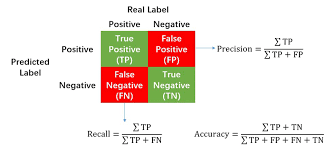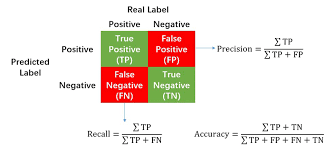

In [83]:
from sklearn.metrics import classification_report,confusion_matrix

In [82]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.88      0.94       504
                                 Apple___Black_rot       0.99      0.82      0.90       497
                          Apple___Cedar_apple_rust       0.98      0.80      0.88       440
                                   Apple___healthy       0.97      0.92      0.94       502
                               Blueberry___healthy       0.98      0.94      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.97      0.97       421
                 Cherry_(including_sour)___healthy       1.00      0.92      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.92      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.94      0.

In [86]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[445,   2,   0, ...,   0,   0,   0],
       [  0, 406,   0, ...,   0,   0,   0],
       [  0,   0, 352, ...,   3,   0,   4],
       ...,
       [  0,   0,   0, ..., 482,   0,   0],
       [  0,   0,   0, ...,   0, 431,   0],
       [  0,   0,   1, ...,   0,   0, 478]], dtype=int64)

In [87]:
## Confusion Matrix Visualization

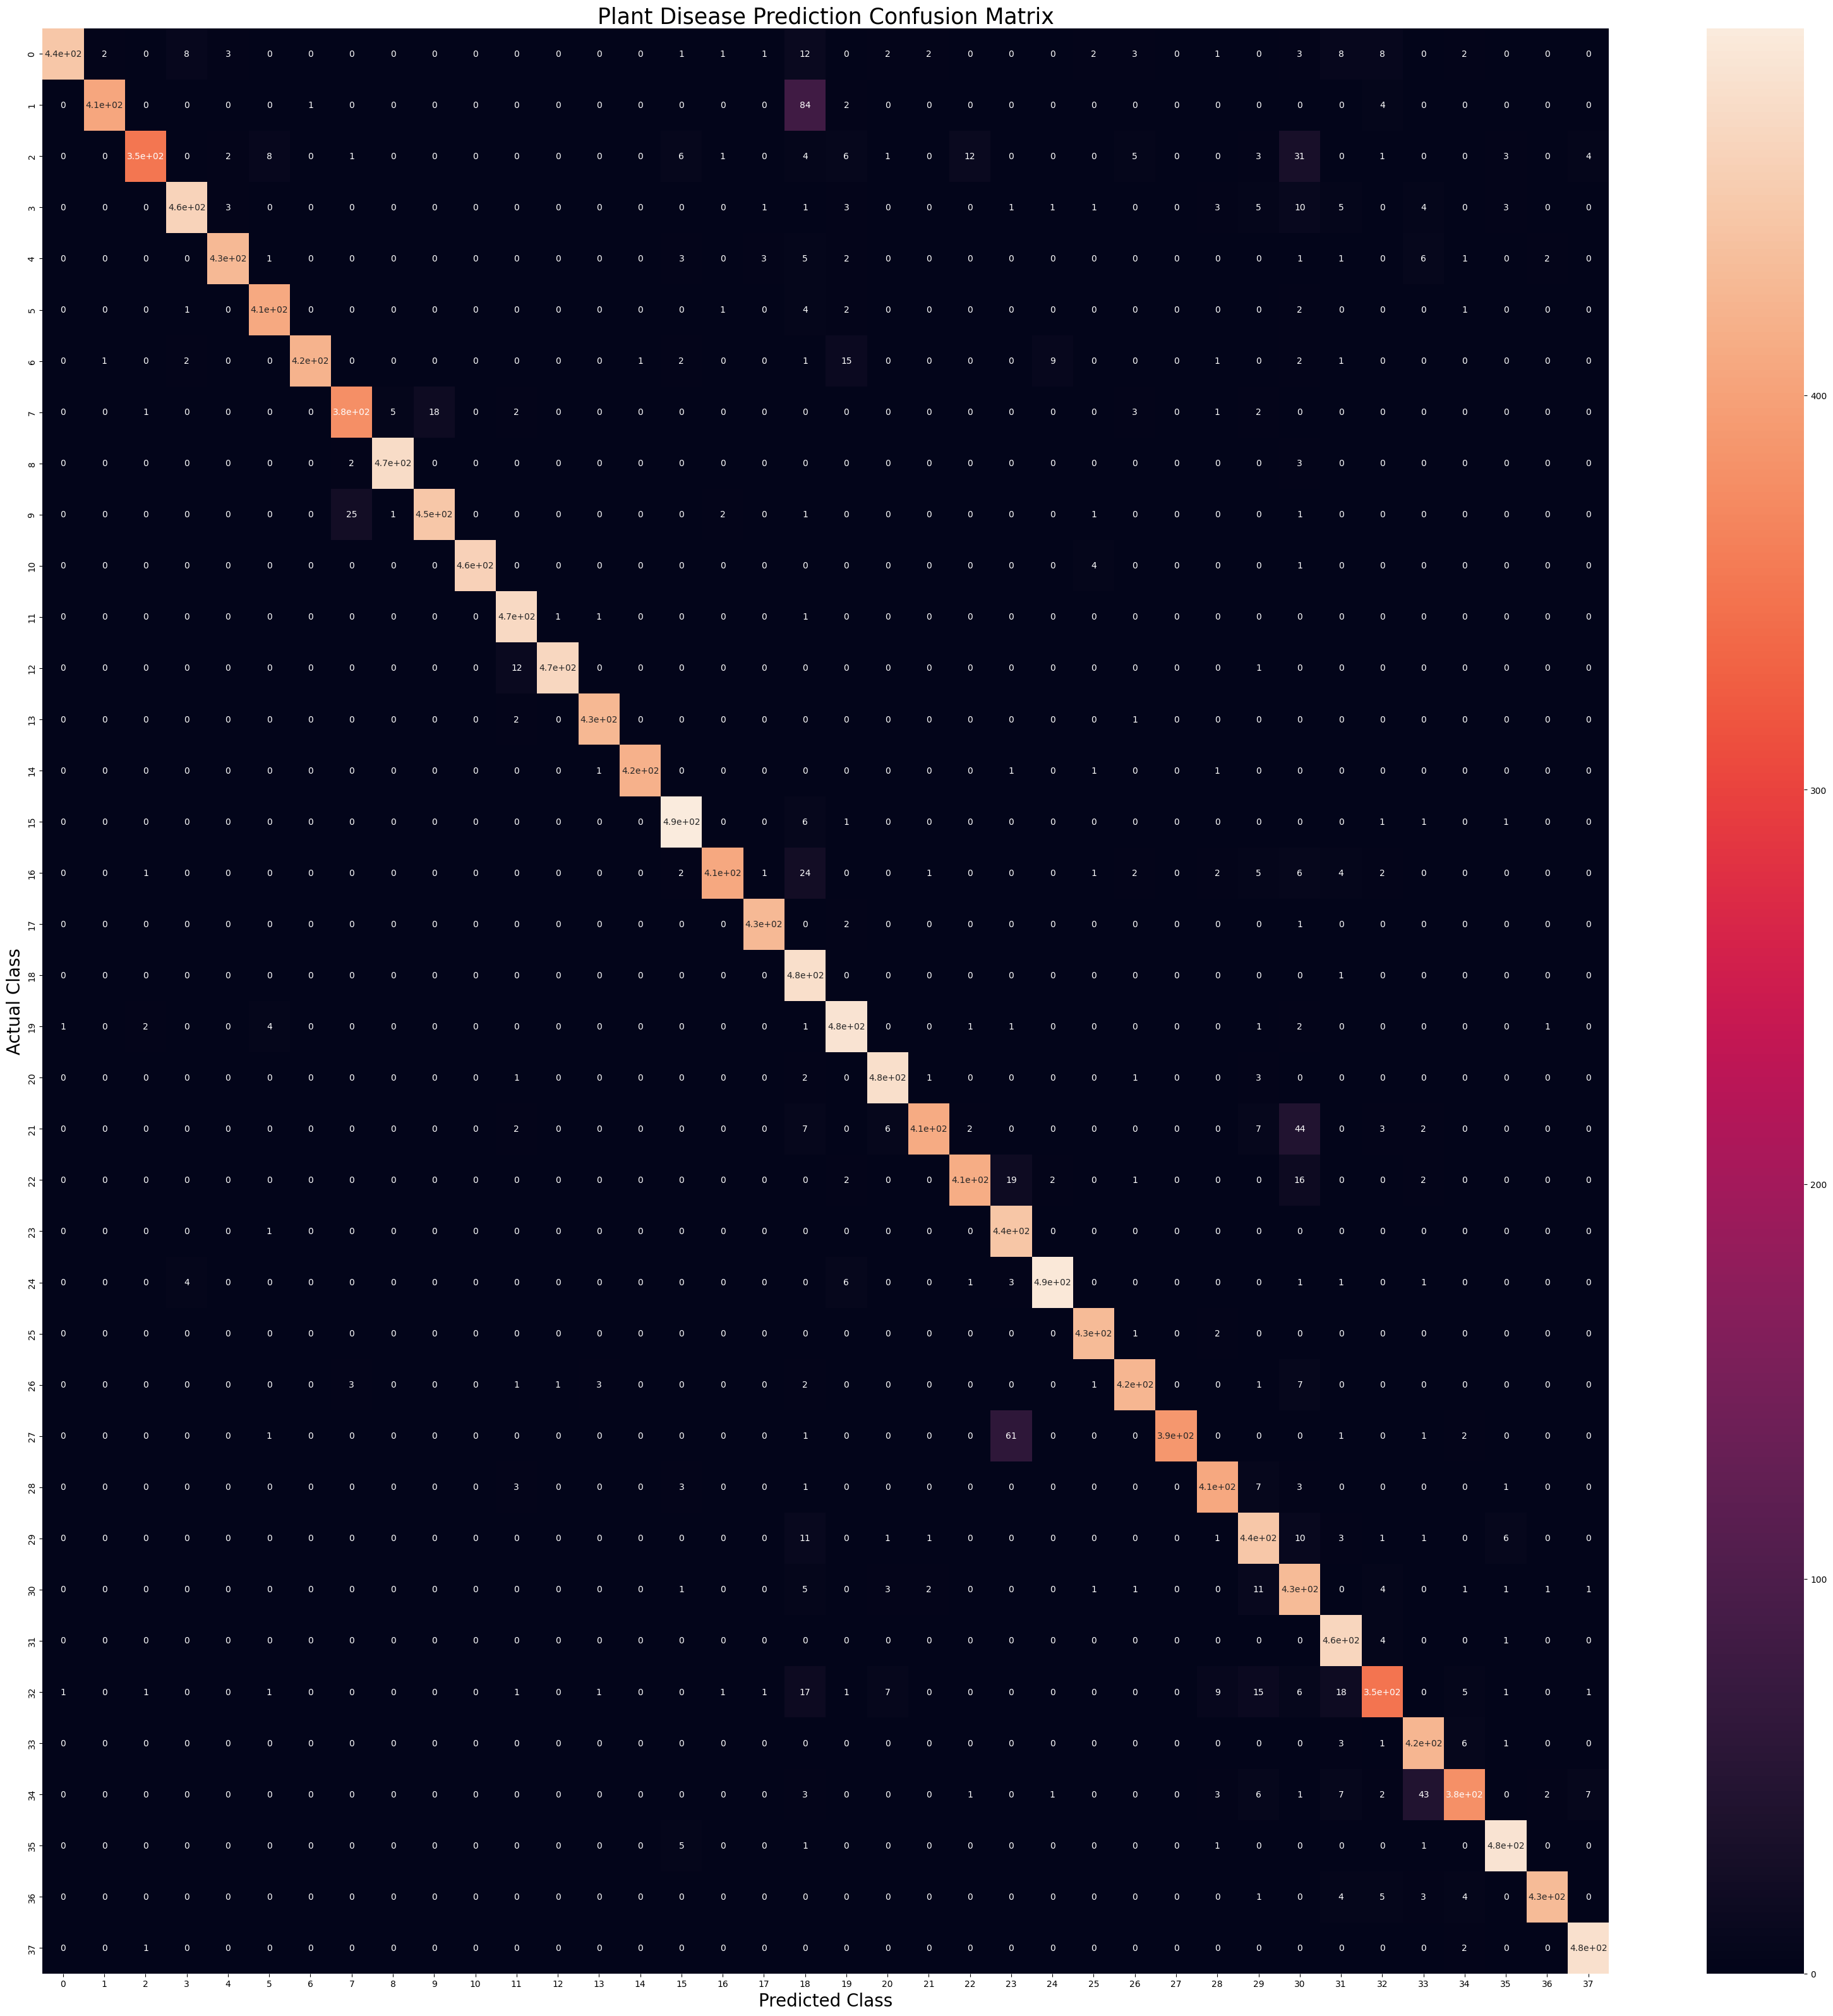

In [92]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()